In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE

import umap

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
sentences = ["this was horrible","this was great","it was kinda good, but mostly bad"]
analyzer = SentimentIntensityAnalyzer()




In [10]:
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

this was horrible------------------------------------------------ {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
this was great--------------------------------------------------- {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}
it was kinda good, but mostly bad-------------------------------- {'neg': 0.411, 'neu': 0.433, 'pos': 0.156, 'compound': -0.6055}


In [3]:
ReviewData = pd.read_csv("steam_reviews.csv")
#ReviewData = pd.read_csv("D:\my data\export_dataframe.csv")
ReviewData.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [6]:
ReviewData = ReviewData.loc[ReviewData['title'] == 'Wallpaper Engine']
ReviewData.head()



result = pd.concat(frames)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
22234,2017-07-17,0,0,9,True,Recommended,Cool as hell!,Wallpaper Engine
22235,2017-07-17,0,0,6,True,Recommended,A wonderful additional to your 'gaming' set up...,Wallpaper Engine
22236,2017-07-08,0,0,100,True,Recommended,ok.,Wallpaper Engine
22237,2017-07-17,0,0,24,True,Recommended,sexy anime tiddies xd,Wallpaper Engine
22238,2017-07-17,0,0,12,True,Recommended,Best Steam app ever 6 years ago I got into Ste...,Wallpaper Engine


In [7]:
from sklearn import preprocessing

date = ReviewData.loc[:,"date_posted"].values

numerizedDates = []

for x in range(len(date)):
    year = date[x][0:4]
    month = date[x][5:7]
    day = date[x][8:10]

    year = int(year)
    month = int(month)
    day = int(day)

    newDate = year*100+month
    newDate = newDate *100 +day
    numerizedDates.append(newDate)


numerizedDates = np.array(numerizedDates)
    
numerizedDates= numerizedDates.reshape(-1, 1)

#normalized = preprocessing.normalize(numerizedDates)
numerizedDates= StandardScaler().fit_transform(numerizedDates)


In [6]:
#sort the data into name and the amount of reviews

Titles =ReviewData.loc[:,"title"].values


SortedGameData = pd.DataFrame([["empty",0 ]], columns=('Name',"Number"))

for x in range(len(Titles)):
    tempData =SortedGameData.loc[:,"Name"].values
    
    if Titles[x] in tempData:
        
        index = SortedGameData[SortedGameData["Name"]==Titles[x]].index.values
        SortedGameData.Number[index] +=1
    else:
        appenddata = pd.DataFrame([[Titles[x],1 ]], columns=('Name',"Number"))
        SortedGameData = SortedGameData.append(appenddata, ignore_index=True)

SortedGameData.to_csv (r'D:\my data\SortedData.csv', index = False, header=True)
SortedGameData.head()



D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Number
0,empty,0
1,Expansion - Hearts of Iron IV: Man the Guns,3
2,Dead by Daylight,22221
3,Wargroove,10
4,Wallpaper Engine,170


In [6]:

SortedGameData =pd.read_csv("D:\my data\SortedData.csv")

    
SortedGameData.head()




,Name,Number
0,empty,0
1,Expansion - Hearts of Iron IV: Man the Guns,3
2,Dead by Daylight,22221
3,Wargroove,10
4,Wallpaper Engine,170


In [7]:


number = SortedGameData.loc[:,"Number"].values
for x in range(len(number)):
    if number[x] <100:
        SortedGameData= SortedGameData.drop([x],axis= 0)
        



SortedGameData.head()

,Name,Number
2,Dead by Daylight,22221
4,Wallpaper Engine,170
5,Factorio,170
6,Insurgency: Sandstorm,220
10,MONSTER HUNTER: WORLD,18412


In [8]:
names = SortedGameData.loc[:,"Name"].values

newData = "empty"

for x in range(len(names)):
    TempData = ReviewData.loc[ReviewData['title'] == names[x]]
    recommendation =TempData.loc[:,"recommendation"].values 
    reviews =TempData.loc[:,"review"].values 
    
    firstHundredRecommended = []
    firstHundredNotRecommended = []
    
    Name = []
    
    
    for j in range(len(recommendation)):
        if recommendation[j] == "Recommended":
            if len(firstHundredRecommended) < 100:
                firstHundredRecommended.append(reviews[j])
        else:
            if len(firstHundredNotRecommended) < 100:
                firstHundredNotRecommended.append(reviews[j])
        if len(Name) < 100:
                Name.append(names[x])
                
    
    while len(firstHundredRecommended) != len(firstHundredNotRecommended):
        if len(firstHundredRecommended) < len(firstHundredNotRecommended):
            firstHundredRecommended.append("empty")
        else:
            firstHundredNotRecommended.append("empty")

    
    firstHundredRecommended = np.transpose(firstHundredRecommended)
    
    
    
    firstHundredNotRecommended = np.transpose(firstHundredNotRecommended)
    Name = np.transpose(Name)
    
    
    
    collectedData =[firstHundredRecommended,firstHundredNotRecommended,Name]
    
    collectedData =np.transpose(collectedData)
    
    dataLabels = ["Recommended","Not Recommended","Name"]
    
    tempDatamframe = pd.DataFrame(data = collectedData, columns = dataLabels) 
    
    
    if type(newData) is str:
        newData = tempDatamframe
    else:
        newData = pd.concat([newData,tempDatamframe])

    
    
newData.head()

,Recommended,Not Recommended,Name
0,Out of all the reviews I wrote This one is pro...,Amount of bugs and glitches from error during ...,Dead by Daylight
1,Disclaimer I survivor main. I play games for f...,i would not recommend this.. this game used to...,Dead by Daylight
2,ENGLISH After playing for more than two years ...,I couldn't even start a gamewith My friends. O...,Dead by Daylight
3,Out of all the reviews I wrote This one is pro...,The game is completely unbalanced it doesn't m...,Dead by Daylight
4,I have never been told to kill myself more tha...,this game is dog s hit,Dead by Daylight


In [16]:
# exploration of the data



wallpaper = newData.loc[newData['Name'] == 'Insurgency: Sandstorm']
wallpaper.head()


,Recommended,Not Recommended,Name
0,PROS Best Gunplay in a game ive played for yea...,The core aspects of the game are really nice g...,Insurgency: Sandstorm
1,The gameplay is wonderful but please fix the h...,In general im sure it can be a decent game but...,Insurgency: Sandstorm
2,Really fun game. Fast to just jump in a game a...,At this moment they gotta fix the performance ...,Insurgency: Sandstorm
3,),Waiting for the optimization from developers.,Insurgency: Sandstorm
4,The insurgency series are similar to squad and...,The old Insurgency game is so much better than...,Insurgency: Sandstorm


In [9]:
# vader on the sorted data

textReviews = newData.loc[:,"Recommended"].values


vaderScoresComp = []
vaderScoresPos = []
vaderScoresNeg = []
vaderScoresNeu = []


for x in range(len(textReviews)):
    if type(textReviews[x]) is float:
        textReviews[x] = str(textReviews[x])
    vs = analyzer.polarity_scores(textReviews[x])
    vaderScoresComp.append(vs["compound"])
    vaderScoresPos.append(vs["pos"])
    vaderScoresNeg.append(vs["neg"])
    vaderScoresNeu.append(vs["neu"])


In [10]:

names  = newData.loc[:,"Name"].values

currentName = "Dead by Daylight"
counter = 0
sum = 0
for x in range(len(vaderScoresComp)):
    if names[x] == currentName:
        counter += 1
        sum = sum +vaderScoresComp[x]
    else :
        temp = sum/counter
        print(currentName + " average score is "+ str( temp ))
        
        counter = 1
        sum = vaderScoresComp[x]
        currentName =names[x]

# dead by daylight is horror
# Wallpaper Engine is a tool
# Factorio is strategy
# Insurgency: Sandstorm is FPS
# MONSTER HUNTER: WORLD is action
# Divinity: Original Sin 2 is RPG
# Garry's Mod is sandbox
# Terraria is survival
# Sid Meier’s Civilization® VI is strategy
# Rocket League® is action
# ASTRONEER is survival
# Euro Truck Simulator 2 is simulation
# Grand Theft Auto V is action
# RimWorld is strategy
# RESIDENT EVIL 2 / BIOHAZARD RE:2 is horror
# Slay the Spire is rougelike
# Stardew Valley is simulation
# PLAYERUNKNOWN'S BATTLEGROUNDS is survival (FPS)
# Don't Starve Together is Survival
# Rust is survival
# Subnautica is survival
# Left 4 Dead 2 is FPS
# ARK: Survival Evolved is survival
# The Elder Scrolls V: Skyrim is RPG


Dead by Daylight average score is 0.30859400000000003
Wallpaper Engine average score is 0.46706199999999987
Factorio average score is 0.4729359999999997
Insurgency: Sandstorm average score is 0.5506319999999999
MONSTER HUNTER: WORLD average score is 0.5485319999999999
Divinity: Original Sin 2 - Definitive Edition average score is 0.40314599999999984
Garry's Mod average score is 0.400953
Terraria average score is 0.5350879999999999
Sid Meier’s Civilization® VI average score is 0.4897829999999999
Rocket League® average score is 0.5826579999999997
ASTRONEER average score is 0.7072849999999999
Euro Truck Simulator 2 average score is 0.602822
Grand Theft Auto V average score is 0.4899939999999999
RimWorld average score is 0.24027099999999998
RESIDENT EVIL 2 / BIOHAZARD RE:2 average score is 0.475739
Slay the Spire average score is 0.5935269999999998
Stardew Valley average score is 0.6118199999999996
PLAYERUNKNOWN'S BATTLEGROUNDS average score is 0.4412689999999998
Don't Starve Together aver

In [10]:

vaderNeu = np.transpose(vaderScoresNeu)
vaderNeg = np.transpose(vaderScoresNeg)
vaderPos = np.transpose(vaderScoresPos)
vaderCom = np.transpose(vaderScoresComp)


allExtractedData =[vaderNeu,vaderNeg,vaderPos,vaderCom]
allExtractedData = np.transpose(allExtractedData)

tempnames = ["vaderNeu","vaderNeg","vaderPos","vaderCom"]

standarizedData =StandardScaler().fit_transform(allExtractedData)

pd.DataFrame(data = standarizedData, columns = tempnames).head()



,vaderNeu,vaderNeg,vaderPos,vaderCom
0,0.198684,0.371831,-0.489216,0.515977
1,0.247700,0.438932,-0.591199,-2.788069
2,0.680679,0.148160,-0.824911,-2.962539
3,0.198684,0.371831,-0.489216,0.515977
4,-0.021891,0.958967,-0.705930,-2.112576


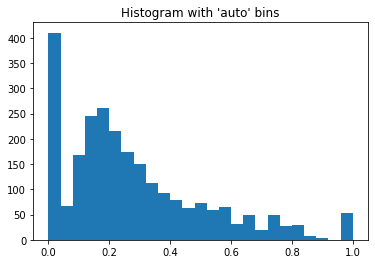

In [70]:
#Histogram

rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))


_ = plt.hist(vaderPos, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()


In [ ]:


index = SortedGameData[SortedGameData["Number"]==max(SortedGameData.Number)].index.values

names = SortedGameData.loc[:,"Name"].values
gameNameWithMostReviews =names[index]




for x in range(len(Titles)):
    if Titles[x] != gameNameWithMostReviews:
        ReviewData =ReviewData.drop(x)
        
ReviewData.to_csv (r'D:\my data\export_dataframe.csv', index = False, header=True)
ReviewData.head()

In [ ]:
ReviewData.head()


In [ ]:

Titles =ReviewData.loc[:,"title"].values

textReviews = ReviewData.loc[:,"review"].values

import time
time_start = time.time()

vaderScoresComp = []
vaderScoresPos = []
vaderScoresNeg = []
vaderScoresNeu = []


for x in range(len(textReviews)):
    if type(textReviews[x]) is float:
        textReviews[x] = str(textReviews[x])
    vs = analyzer.polarity_scores(textReviews[x])
    vaderScoresComp.append(vs["compound"])
    vaderScoresPos.append(vs["pos"])
    vaderScoresNeg.append(vs["neg"])
    vaderScoresNeu.append(vs["neu"])



print("done")
print(format(time.time()-time_start))


In [ ]:
# Histogram of the compound Vader score



In [ ]:
#Check how vader correlates with compound score to recommendation

recommendated = ReviewData.loc[:,"recommendation"].values
funny = ReviewData.loc[:,"funny"].values

vaderCorrelation =0

SummedVaderScoresRecommended =0
numberOfRecommended=0

SummedVaderScoresNotRecommended =0
numberOfNotRecommended=0


for x in range(len(recommendated)):
    if recommendated[x] == "Recommended":
        SummedVaderScoresRecommended+=vaderScoresComp[x]
        numberOfRecommended+=1
        
        if vaderScoresComp[x] > 0:
            vaderCorrelation+=1
    else:
        
        SummedVaderScoresNotRecommended+=vaderScoresComp[x]
        numberOfNotRecommended+=1
        
        if vaderScoresComp[x] < 0:
            vaderCorrelation+=1

sumFunnyPosVader =0
posVader =0
sumFunnyNegVader =0
negVader =0
            
for x in range(len(vaderScoresComp)):
    if vaderScoresComp[x] > 0:
        sumFunnyPosVader+=funny[x]
        posVader+=1
    else:
        sumFunnyNegVader+=funny[x]
        negVader+=1
        
averageFunnyNumberforPos =sumFunnyPosVader/posVader
averageFunnyNumberforNeg =sumFunnyNegVader/negVader

averageVaderScoreRecommended=SummedVaderScoresRecommended/numberOfRecommended
averageVaderScoreNotRecommended=SummedVaderScoresNotRecommended/numberOfNotRecommended

vaderCorrelationPercent =(vaderCorrelation/len(recommendated))*100

print(averageFunnyNumberforPos)
print(averageFunnyNumberforNeg)

print(averageVaderScoreRecommended)
print(averageVaderScoreNotRecommended)
print(vaderCorrelationPercent)



In [ ]:
recommendated = ReviewData.loc[:,"recommendation"].values

numeratedRecommend = []


for x in range(len(recommendated)):
    if recommendated[x] == "Recommended":
        numeratedRecommend.append(1)
    else:
        numeratedRecommend.append(0)



In [ ]:
earlyaccess = ReviewData.loc[:,"is_early_access_review"].values

numeratedAccess = []

for x in range(len(earlyaccess)):
    if earlyaccess[x]:
        numeratedAccess.append(1)
    else:
        numeratedAccess.append(0)


In [ ]:
#standariz and order the data All vaderScores

helpful = ReviewData.loc[:,"helpful"].values
funny = ReviewData.loc[:,"funny"].values
played = ReviewData.loc[:,"hour_played"].values 


a = np.transpose(numeratedAccess)
b = np.transpose(numeratedRecommend)


vaderNeu = np.transpose(vaderScoresNeu)
vaderNeg = np.transpose(vaderScoresNeg)
vaderPos = np.transpose(vaderScoresPos)
vaderCom = np.transpose(vaderScoresComp)

allExtractedData =[helpful,funny,played,a,b,vaderNeu,vaderNeg,vaderPos,vaderCom]
allExtractedData = np.transpose(allExtractedData)

tempnames = ["helpful","funny","played","a","b","vaderNeu","vaderNeg","vaderPos","vaderCom"]

standarizedData =StandardScaler().fit_transform(allExtractedData)

pd.DataFrame(data = standarizedData, columns = tempnames).head()



In [ ]:
#standariz and order the data com vaderScores only

helpful = ReviewData.loc[:,"helpful"].values
funny = ReviewData.loc[:,"funny"].values
played = ReviewData.loc[:,"hour_played"].values 


a = np.transpose(numeratedAccess)
b = np.transpose(numeratedRecommend)


vaderNeu = np.transpose(vaderScoresNeu)
vaderNeg = np.transpose(vaderScoresNeg)
vaderPos = np.transpose(vaderScoresPos)
vaderCom = np.transpose(vaderScoresComp)

allExtractedData =[helpful,funny,played,a,b,vaderCom]
allExtractedData = np.transpose(allExtractedData)

tempnames = ["helpful","funny","played","a","b","vaderCom"]

standarizedData =StandardScaler().fit_transform(allExtractedData)

pd.DataFrame(data = standarizedData, columns = tempnames).head()

In [ ]:
#3 component
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(standarizedData)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head()

In [11]:
#2 component
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(standarizedData)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.275681,-0.124146
1,-2.019857,1.084465
2,-2.380379,0.650256
3,-0.275681,-0.124146
4,-1.789553,1.343691


In [45]:
newData[["Name"]].head()


p1 =principalDf.loc[:,"principal component 1"].values;
p2 =principalDf.loc[:,"principal component 2"].values;
name =newData.loc[:,"Name"].values;



dataforPlot = [ p1,p2,name]

dataforPlot = np.transpose(dataforPlot)
tempnames = ["principal component 1","principal component 2","title"]

finalDf = pd.DataFrame(data = dataforPlot, columns = tempnames)

In [46]:
print(len(finalDf.loc[:,"title"].values))

2500


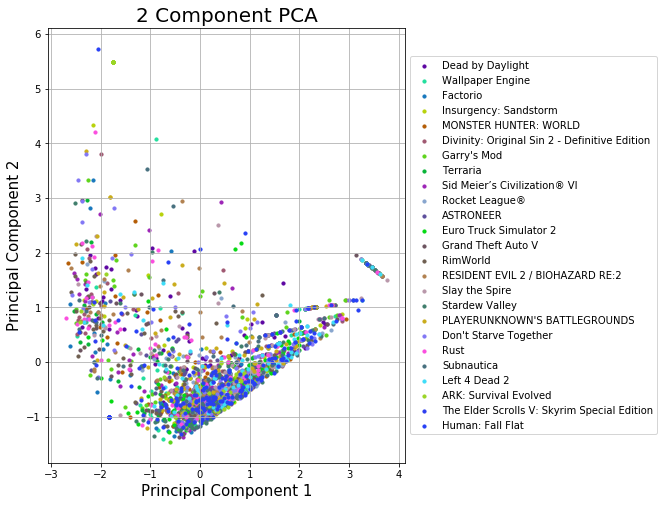

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = finalDf.loc[:,"title"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['title'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))



In [64]:
import time
time_start = time.time()


X_embedded = TSNE(n_components=2,perplexity=10,n_iter =15000).fit_transform(standarizedData)
print(format(time.time()-time_start))

145.9223461151123


In [65]:
tSNEdata = pd.DataFrame(data = X_embedded
             , columns = ['tSNE component 1', 'tSNE component 2'])



tSNEdataFinal = pd.concat([tSNEdata, finalDf[['title']]], axis = 1)
tSNEdataFinal.head(5)


,tSNE component 1,tSNE component 2,title
0,-5.591697,-32.784546,Dead by Daylight
1,4.382257,-150.029724,Dead by Daylight
2,14.632642,-141.379715,Dead by Daylight
3,-5.591713,-32.784519,Dead by Daylight
4,-12.121352,-122.500549,Dead by Daylight


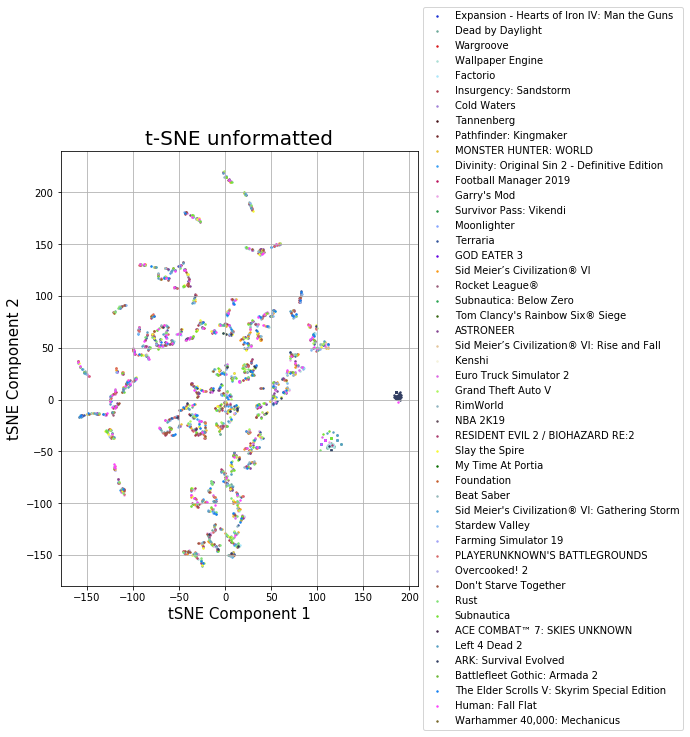

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE Component 1', fontsize = 15)
ax.set_ylabel('tSNE Component 2', fontsize = 15)
ax.set_title('t-SNE unformatted', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = ReviewData.loc[:,"title"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = tSNEdataFinal['title'] == target
    ax.scatter(tSNEdataFinal.loc[indicesToKeep, 'tSNE component 1']
               , tSNEdataFinal.loc[indicesToKeep, 'tSNE component 2']
               , c = color
               , s = 2)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
tSNEdataFinal = pd.concat([tSNEdata, ReviewData[['recommendation']]], axis = 1)
tSNEdataFinal.head(5)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE Component 1', fontsize = 15)
ax.set_ylabel('tSNE Component 2', fontsize = 15)
ax.set_title('t-SNE unformatted', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = ReviewData.loc[:,"recommendation"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = tSNEdataFinal['recommendation'] == target
    ax.scatter(tSNEdataFinal.loc[indicesToKeep, 'tSNE component 1']
               , tSNEdataFinal.loc[indicesToKeep, 'tSNE component 2']
               , c = color
               , s = .5)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
reducer = umap.UMAP()

embedding = reducer.fit_transform(allExtractedData)

In [ ]:
finalDf = pd.concat([principalDf, ReviewData[['recommendation']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = ReviewData.loc[:,"recommendation"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['recommendation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = .5)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

finalDf = pd.concat([principalDf, ReviewData[['recommendation']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = ReviewData.loc[:,"recommendation"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['recommendation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = .5)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

names = SortedGameData.loc[:,"Name"].values

newnames= np.delete(names, 0)

idividualGameData =[]

for x in range(len(newnames)):
    for num in range(100)
        


In [ ]:

helpful = ReviewData.loc[:,"helpful"].values
funny = ReviewData.loc[:,"funny"].values
played = ReviewData.loc[:,"hour_played"].values 


a = np.transpose(numeratedAccess)
b = np.transpose(numeratedRecommend)


vaderNeu = np.transpose(vaderScoresNeu)
vaderNeg = np.transpose(vaderScoresNeg)
vaderPos = np.transpose(vaderScoresPos)
vaderCom = np.transpose(vaderScoresComp)

allExtractedData =[helpful,funny,played,a,b,vaderNeu,vaderNeg,vaderPos,vaderCom]
allExtractedData = np.transpose(allExtractedData)

tempnames = ["helpful","funny","played","a","b","vaderNeu","vaderNeg","vaderPos","vaderCom"]

standarizedData =StandardScaler().fit_transform(allExtractedData)

pd.DataFrame(data = standarizedData, columns = tempnames).head()

In [ ]:
tempframe = ReviewData.loc[ReviewData['title'] == 'Wargroove']

tempframe.head()


In [ ]:

helpful = ReviewData.loc[:,"helpful"].values
funny = ReviewData.loc[:,"funny"].values
played = ReviewData.loc[:,"hour_played"].values 

titles = ReviewData.loc[:,"title"].values


a = np.transpose(numeratedAccess)
b = np.transpose(numeratedRecommend)


vaderNeu = np.transpose(vaderScoresNeu)
vaderNeg = np.transpose(vaderScoresNeg)
vaderPos = np.transpose(vaderScoresPos)
vaderCom = np.transpose(vaderScoresComp)

allExtractedData =[helpful,funny,played,a,b,vaderCom,titles]

standarizedData =StandardScaler().fit_transform(allExtractedData)

allExtractedData = np.transpose(allExtractedData)

tempnames = ["helpful","funny","played","early","recomm","vaderCom","title"]

dataWithNames =pd.DataFrame(data = allExtractedData, columns = tempnames)
dataWithNames.head()



In [ ]:
names = SortedGameData.loc[:,"Name"].values

newnames= np.delete(names, 0)

allNewData = []

for x in range(len(newnames)):
    idividualGameData =[]
    tempframe = dataWithNames.loc[dataWithNames['title'] == newnames[x]]
    tempframe= tempframe.reset_index()
    for num in range(200):
        if num< len(tempframe.index):
            helpdata = tempframe.loc[:,"helpful"]
            funnydata = tempframe.loc[:,"funny"]
            playeddata = tempframe.loc[:,"played"]
            earlydata = tempframe.loc[:,"early"]
            recommdata = tempframe.loc[:,"recomm"]
            vaderdata = tempframe.loc[:,"vaderCom"]
            idividualGameData.append(helpdata[num])
            idividualGameData.append(funnydata[num])
            idividualGameData.append(playeddata[num])
            idividualGameData.append(earlydata[num])
            idividualGameData.append(recommdata[num])
            idividualGameData.append(vaderdata[num])
        else:
            idividualGameData.append(0)
            idividualGameData.append(0)
            idividualGameData.append(0)
            idividualGameData.append(0)
            idividualGameData.append(0)
            idividualGameData.append(0)
    allNewData.append(np.transpose(idividualGameData))
        

        
formattedDataForPCA =allNewData
allNewData =np.transpose(allNewData)
longdata =pd.DataFrame(data = allNewData, columns = newnames)

longdata.to_csv (r'D:\my data\longdata.csv', index = False, header=True)

longdata.head()

In [ ]:

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(standarizedData)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

In [ ]:
print(standarizedData)

In [ ]:
finalDf = pd.concat([principalDf, SortedGameData[['Name']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = SortedGameData.loc[:,"Name"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Name'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


In [1]:
import os
import gensim

In [ ]:
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [ ]:
import smart_open

textReviews = ReviewData.loc[:,"review"].values

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))


def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

def read_corpus_modified(reviews, tokens_only=False):
    for x in range(len(textReviews)):
        tokens = gensim.utils.simple_preprocess(textReviews[x])
        if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [x])
    

In [ ]:
print(len( textReviews))

testReviews = textReviews[0:50000]

print( testReviews[0])

In [ ]:
textReviews = ReviewData.loc[:,"review"].values

for x in range(len(textReviews)):
    if type(textReviews[x]) is float:
        textReviews[x] = str(textReviews[x])

shuffledReviews = textReviews
np.random.shuffle(shuffledReviews)

testReviews = shuffledReviews[0:50000]
trainReviews =shuffledReviews[50000:len(shuffledReviews)]



In [ ]:
def read_corpus_modified(reviews, tokens_only=False):
    for x in range(len(textReviews)):
        tokens = gensim.utils.simple_preprocess(textReviews[x])
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [x])

In [ ]:
train_corpus = list(read_corpus_modified(trainReviews))
test_corpus = list(read_corpus_modified(testReviews, tokens_only=True))

In [6]:
newModel = Doc2Vec(train_corpus, vector_size=5, window=2, min_count=1, workers=4)

NameError: name 'Doc2Vec' is not defined

In [5]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("my_doc2vec_model")
newModel.save(fname)

newModel = Doc2Vec.load(fname)  # you can continue training with the loaded model!


NameError: name 'newModel' is not defined

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=8, min_count=2, epochs=50)

model.build_vocab(train_corpus)

In [ ]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

In [ ]:
textReviews = ReviewData.loc[:,"review"].values

for x in range(len(textReviews)):
    if type(textReviews[x]) is float:
        textReviews[x] = str(textReviews[x])

WordseperatedReviews = list(read_corpus_modified(textReviews, tokens_only=True))

In [ ]:
print(WordseperatedReviews[0])

In [ ]:
vector = model.infer_vector(WordseperatedReviews[0])
print(vector)

In [ ]:
doc2Vec = []

for x in range(len(WordseperatedReviews)):
    doc2Vec.append(model.infer_vector(WordseperatedReviews[x]))

In [ ]:
print(doc2Vec[0])

In [ ]:


tempnames = ["1","2","3","4","5","6","7","8"]



doc2VecData = pd.DataFrame(data = doc2Vec, columns = tempnames)


doc2VecData.to_csv (r'D:\my data\doc2VecData.csv', index = False, header=True)
doc2VecData.head()

In [ ]:
#standariz and order the data doc2Vec Scores

doc2VecData = pd.read_csv("D:\my data\doc2VecData.csv")


helpful = ReviewData.loc[:,"helpful"].values
funny = ReviewData.loc[:,"funny"].values
played = ReviewData.loc[:,"hour_played"].values 


a = np.transpose(numeratedAccess)
b = np.transpose(numeratedRecommend)

doc2vec1 =doc2VecData.loc[:,"1"].values
doc2vec2 =doc2VecData.loc[:,"2"].values
doc2vec3 =doc2VecData.loc[:,"3"].values
doc2vec4 =doc2VecData.loc[:,"4"].values
doc2vec5 =doc2VecData.loc[:,"5"].values
doc2vec6 =doc2VecData.loc[:,"6"].values
doc2vec7 =doc2VecData.loc[:,"7"].values
doc2vec8 =doc2VecData.loc[:,"8"].values


allExtractedData =[helpful,funny,played,a,b,doc2vec1,doc2vec2,doc2vec3,doc2vec4,doc2vec5,doc2vec6,doc2vec7,doc2vec8]
allExtractedData = np.transpose(allExtractedData)

tempnames = ["helpful","funny","played","EarlyAcss","Recomm","doc2vec1","doc2vec2","doc2vec3","doc2vec4","doc2vec5","doc2vec6","doc2vec7","doc2vec8"]



Features = pd.DataFrame(data = allExtractedData, columns = tempnames)

Features.head()

In [ ]:
#2 component
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(doc2VecData)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

In [ ]:
import time
time_start = time.time()


X_embedded = TSNE(n_components=2,perplexity=30,n_iter =5000).fit_transform(doc2VecData)
print(format(time.time()-time_start))